In [4]:
import spacy
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
nlp = spacy.load('de_core_news_md')
pd.set_option('display.max_colwidth', None)

In [6]:
df = pd.read_csv('data/reviews-clean.csv', sep=';')

In [7]:
# Caption to text. Joining all captions in a long text
full_caption_text = '. '.join(df['caption'])
len(full_caption_text)

33521

In [8]:
# Top used words based on arguments
def getWordFrequency(text, pos="NOUN", top_items=0):
    doc = nlp(text)
    words = [token.lemma_
             for token in doc
             if (not token.is_stop and not token.is_punct and (pos == "" or token.pos_ == pos))]
    word_freq = Counter(words)

    return(dict(word_freq.most_common(top_items) if top_items else word_freq.most_common()))

### Bewertungen pro Nummer

In [9]:
sns.set_theme()

<AxesSubplot: xlabel='rating', ylabel='count'>

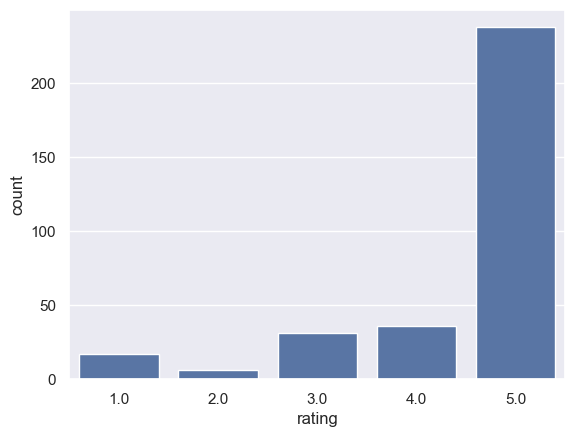

In [10]:
f, ax = plt.subplots(1,1)
ratings = df['rating'].value_counts().reset_index()
ratings.columns = ['rating', 'count']
ratings = ratings.sort_values(by=['rating'], ascending=False)
#ratings
sns.barplot(ratings, x="rating", y='count', color='b', ax=ax)
#ax.set(xlabel='Bewertung', ylabel='Zahl')

### Meistverwendete Wörter

In [11]:
from wordcloud import WordCloud

In [12]:
freq = getWordFrequency(full_caption_text, "NOUN")

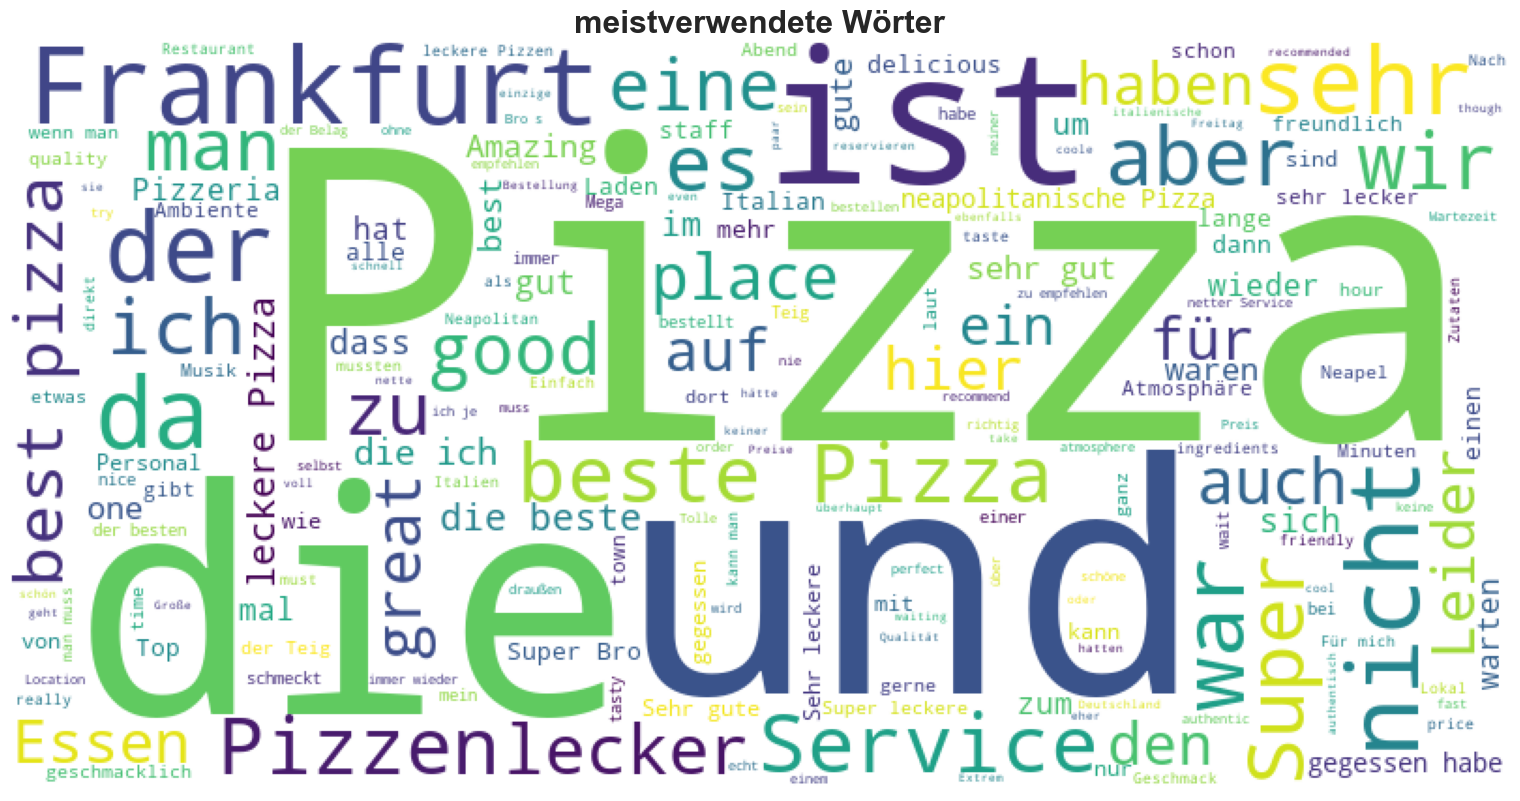

In [13]:
plt.figure(figsize=(15, 12), facecolor = None)
plt.imshow(WordCloud(width = 800, height = 400,
                     background_color='white').generate( full_caption_text ))
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('meistverwendete Wörter', fontsize=23, fontweight='bold')
plt.show()

### Meistverwendete Nomen & Verben

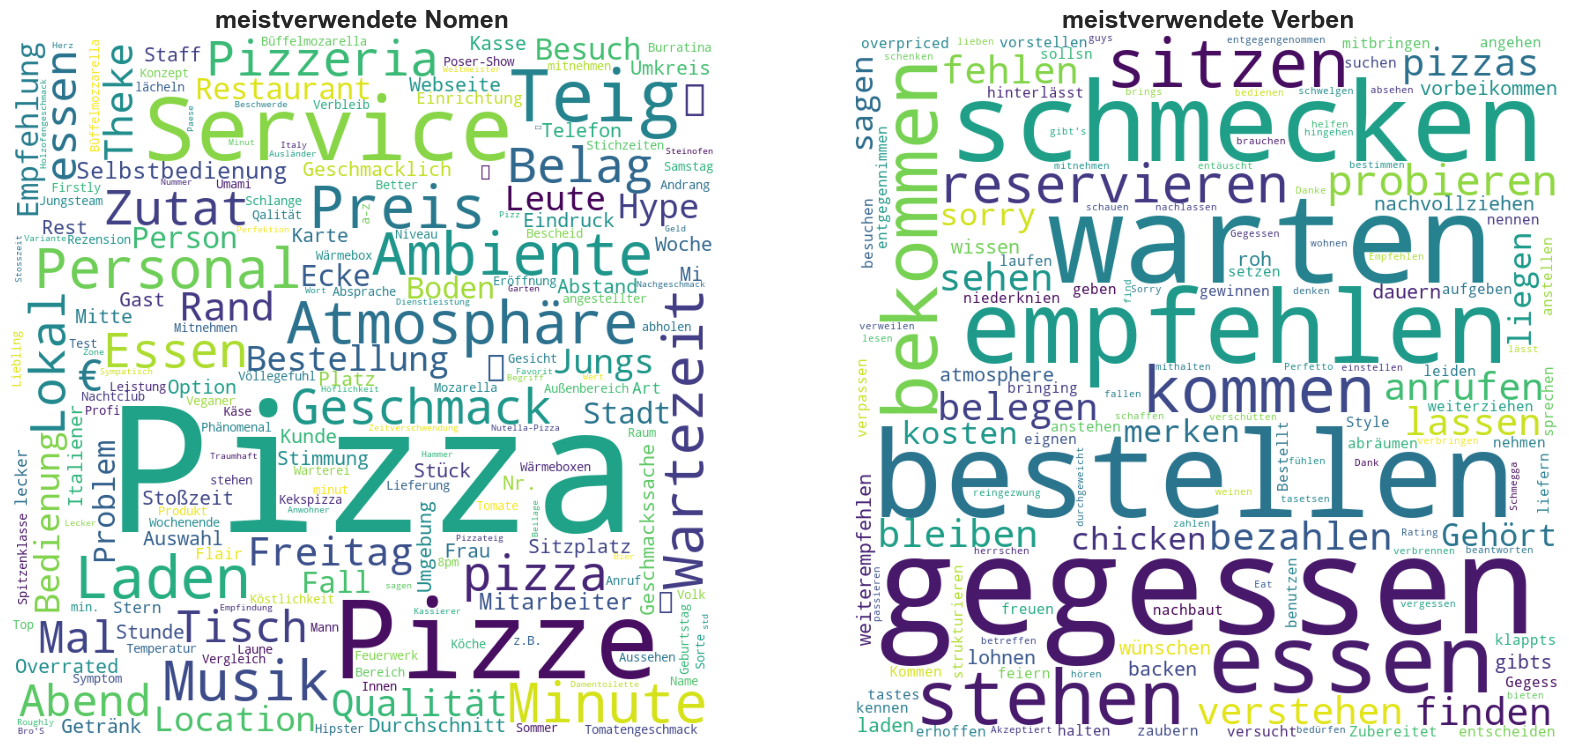

In [14]:
freqNoun = getWordFrequency(full_caption_text, "NOUN")
freqVerb = getWordFrequency(full_caption_text, "VERB")

freqs = [freqNoun, freqVerb]
titles = ['meistverwendete Nomen', 'meistverwendete Verben']

f, axes = plt.subplots(1,2)
f.set_figheight(15)
f.set_figwidth(20)
for i, ax in enumerate(axes):
    ax.imshow(WordCloud(width = 800, height = 800,
                        background_color='white').generate_from_frequencies( freqs[i] ))
    ax.axis('off')
    ax.set_title(titles[i], fontsize=18, fontweight='bold')

### Meisteverwendete Verben pro Bewertung

In [15]:
full_caption_text_1 = '. '.join(df.loc[df['rating'] == 1]['caption'])
full_caption_text_2 = '. '.join(df.loc[df['rating'] == 2]['caption'])
full_caption_text_3 = '. '.join(df.loc[df['rating'] == 3]['caption'])
full_caption_text_4 = '. '.join(df.loc[df['rating'] == 4]['caption'])
full_caption_text_5 = '. '.join(df.loc[df['rating'] == 5]['caption'])

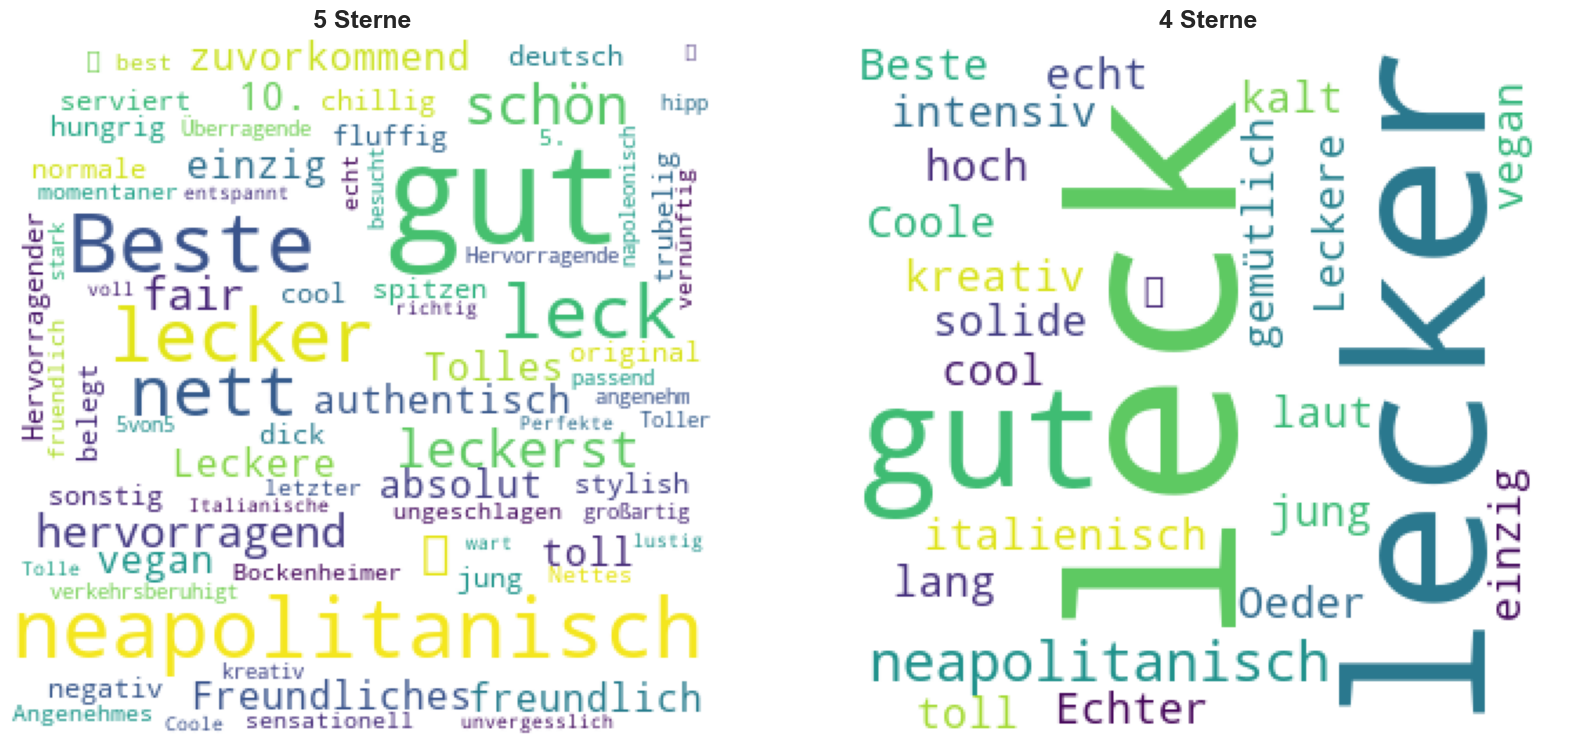

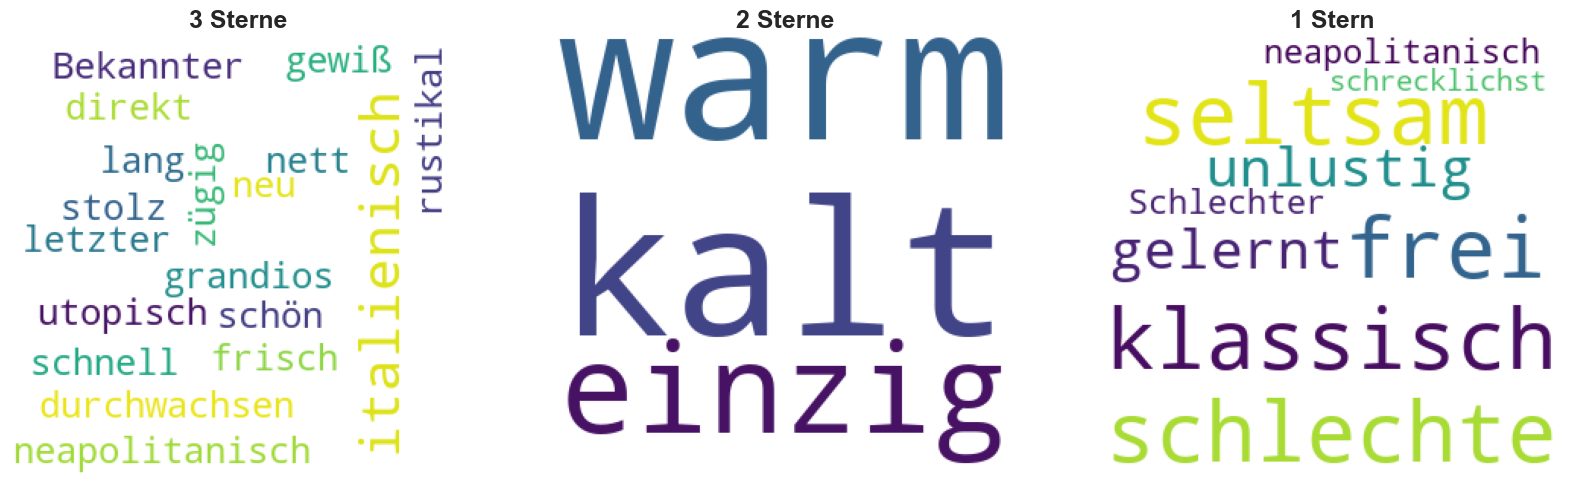

In [16]:
freqs1 = [ getWordFrequency(full_caption_text_5, "ADJ"),
           getWordFrequency(full_caption_text_4, "ADJ")]

freqs2 = [getWordFrequency(full_caption_text_3, "ADJ"),
          getWordFrequency(full_caption_text_2, "ADJ"),
          getWordFrequency(full_caption_text_1, "ADJ")]

titles1 = ['5 Sterne', '4 Sterne']
titles2 = ['3 Sterne', '2 Sterne', '1 Stern']

f1, axes1 = plt.subplots(1, 2)
f2, axes2 = plt.subplots(1, 3)

f1.set_figheight(15)
f1.set_figwidth(20)

f2.set_figheight(15)
f2.set_figwidth(20)

for i, ax in enumerate(axes1):
    ax.imshow(WordCloud(width = 300, height = 300,
                        background_color='white').generate_from_frequencies( freqs1[i] ))
    ax.axis('off')
    ax.set_title(titles1[i], fontsize=18, fontweight='bold')

for i, ax in enumerate(axes2):
    ax.imshow(WordCloud(width = 300, height = 300,
                        background_color='white').generate_from_frequencies( freqs2[i] ))
    ax.axis('off')
    ax.set_title(titles2[i], fontsize=18, fontweight='bold')